In [109]:
#pull all 12 months data
#using FordGO from the SF Bay area and includes 5 cities
%matplotlib notebook

In [2]:
import zipfile, urllib.request, shutil
import pandas as pd
import numpy as np
import glob
import citipy
import csv
import os
from uszipcode import SearchEngine, SimpleZipcode, Zipcode
search = SearchEngine()
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import datetime


In [3]:
#id the folder that has all the zip files
#create a glob for the path and file names
#create a empty list for holding everything 
path = r'C:\Users\Gogster\Documents\GitHub\RawData'

allfiles=glob.glob(path+"/*.zip")

data_list=[]


In [4]:
#list comprehend through the folder with all the zip files
#append to the dataframe merging all the months

for z_file in allfiles:
    df=pd.read_csv(z_file, compression='zip',header=0,sep=',',quotechar='"')
    data_list.append(df)

all_frame=pd.concat(data_list,axis=0,ignore_index=True)    

In [5]:
all_frame.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78.0,Folsom St at 9th St,37.773717,-122.411647,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258.0,University Ave at Oxford St,37.872355,-122.266447,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No
3,85844,2018-03-31 11:28:07.6580,2018-04-01 11:18:52.6130,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No
4,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No


In [6]:
all_frame.shape
#this is all the rows 1.863721M by 16

(1863721, 16)

In [7]:
#create 2 new rows 1 for the zip code and one for the city name
#city 
all_frame.insert(loc=7, column='city', value='abc')
#zip codes
all_frame.insert(loc=8, column='zip_code', value='123456')
#age in years of users
all_frame.insert(loc=16, column='age', value ='99')

In [8]:
#display new table
all_frame.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,city,zip_code,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,abc,123456,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,99,Female,No
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78.0,Folsom St at 9th St,37.773717,-122.411647,abc,123456,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,99,Male,No
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258.0,University Ave at Oxford St,37.872355,-122.266447,abc,123456,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,99,Male,No
3,85844,2018-03-31 11:28:07.6580,2018-04-01 11:18:52.6130,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,abc,123456,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,99,NaN,No
4,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,abc,123456,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,99,Male,No


In [9]:
#remove rows which have Nan values
drop_frame= all_frame.dropna(axis=0,how='any',inplace=False)
#delete extra columns in the data that are not relavent
drop_frame.drop(['bike_share_for_all_trip'],axis = 1, inplace = True)
#display the dataframe
#drop_frame.head()

/anaconda3/envs/wk4data/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [10]:
drop_frame.shape
# 1.741556 M and 18

(1741556, 18)

In [11]:
clean_df=pd.DataFrame(drop_frame)

In [12]:
#find age of user by subtracting birth year from current year
thisyear=2019
clean_df['age'] = thisyear - clean_df['member_birth_year']
clean_df['age'] = clean_df['age'].astype(int)
clean_df['member_birth_year'] = clean_df['member_birth_year'].astype(int)
clean_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,city,zip_code,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,abc,123456,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964,55,Female
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78.0,Folsom St at 9th St,37.773717,-122.411647,abc,123456,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984,35,Male
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258.0,University Ave at Oxford St,37.872355,-122.266447,abc,123456,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983,36,Male
4,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,abc,123456,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979,40,Male
5,281,2018-03-31 23:58:07.8050,2018-04-01 00:02:49.3590,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,abc,123456,200.0,2nd Ave at E 18th St,37.800214,-122.253810,777,Subscriber,1991,28,Male


In [13]:
max_age = 65
# under65_df = drop_frame.loc[:, (drop_frame.isnull().sum(axis=0) <= max_age)]
# under65_df.shape
#did not work


#Use this DF for all work- It holds all the users aged 19 to 65
max_age_df = (clean_df[clean_df['age']<(max_age)])
max_age_df.shape
#1.71882M records

(1718882, 18)

In [110]:
clean_df=pd.DataFrame(max_age_df)
# clean_df.head()

# Trip Duration

In [111]:
# Create a new df to use for analyzing trip duration
trip_df = clean_df[['duration_sec', 'user_type']]
trip_df.shape #(1718882, 2)
trip_df.head()


,duration_sec,user_type
0,71766,Customer
1,62569,Subscriber
2,56221,Customer
4,1566,Subscriber
5,281,Subscriber


In [112]:
#trip_df['duration_min'] = (trip_df['duration_sec']/60).round()
trip_df['duration_sec'] = (trip_df['duration_sec']/3600).round(1)

trip_df.head()
trip_df.shape

/anaconda3/envs/wk4data/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1718882, 2)

In [113]:
trip_df.columns = ['duration_hours', 'user']
trip_df.head()

,duration_hours,user
0,19.9,Customer
1,17.4,Subscriber
2,15.6,Customer
4,0.4,Subscriber
5,0.1,Subscriber


In [114]:
trip_df['duration_hours'].unique().tolist()
len(trip_df['duration_hours'].unique().tolist())

241

In [115]:
trip_df.describe()

,duration_hours
count,1.718882e+06
mean,2.156639e-01
std,5.409923e-01
min,0.000000e+00
25%,1.000000e-01
50%,2.000000e-01
75%,2.000000e-01
max,2.400000e+01


In [116]:
trip_grp_df=trip_df.groupby(['duration_hours'],as_index=False).count()
trip_grp_df=pd.DataFrame(trip_grp_df)
trip_grp_df

,duration_hours,user
0,0.0,92302
1,0.1,761383
2,0.2,493846
3,0.3,202557
4,0.4,79501
5,0.5,34260
6,0.6,15938
7,0.7,10001
8,0.8,5211
9,0.9,3615


In [117]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [-1, 0.1,1.0, 24]

# Create the names for the four bins
group_names = ["Less than 10min", "10 to 1hr", "More than an hour"]

In [118]:
trip_grp_df["Duration Group"] = pd.cut(trip_grp_df["duration_hours"], bins, labels=group_names)
trip_grp_df=pd.DataFrame(trip_grp_df)
trip_grp_df
#clean_df['age_grp'] = pd.cut(clean_df["age"], bins, labels=group_names)
# age_df["age_bracket"]= pd.cut(clean_df["age"], bins, labels=group_names)
#clean_age_df= clean_df.groupby(['age_grp','user_type'])['age_grp'].count()

,duration_hours,user,Duration Group
0,0.0,92302,Less than 10min
1,0.1,761383,Less than 10min
2,0.2,493846,10 to 1hr
3,0.3,202557,10 to 1hr
4,0.4,79501,10 to 1hr
5,0.5,34260,10 to 1hr
6,0.6,15938,10 to 1hr
7,0.7,10001,10 to 1hr
8,0.8,5211,10 to 1hr
9,0.9,3615,10 to 1hr


In [119]:
#trip_grp_df=trip_grp_df.groupby(['duration_hours'],as_index=False).sum()
#trip_grp_df
#trip_grp_df.groupby(['Duration Group','user_type']).sum()
trip_df_reduced=trip_grp_df.groupby(['Duration Group'], as_index=False)['user'].sum()
trip_df_reduced

,Duration Group,user
0,Less than 10min,853685
1,10 to 1hr,847547
2,More than an hour,17650


<IPython.core.display.Javascript object>


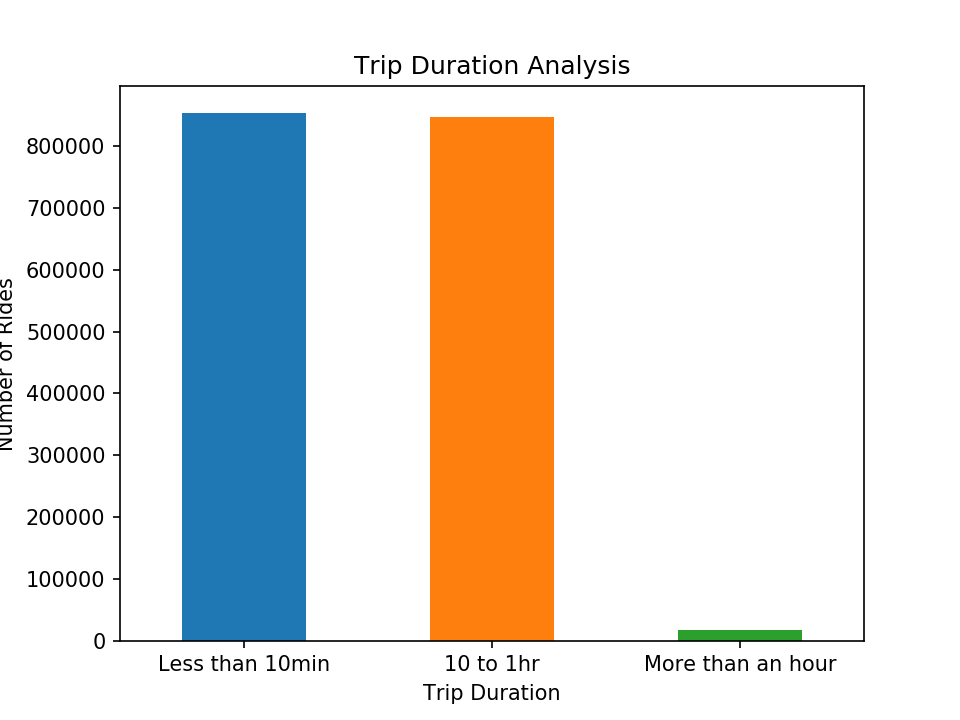

In [128]:
trip_df_reduced.plot(x='Duration Group', y='user', kind='bar', rot=0, legend=False)
plt.title("Trip Duration Analysis")
plt.xlabel("Trip Duration")
plt.ylabel("Number of Rides")

# Save Figure
plt.savefig('Bar Chart Trip Durations.png',dpi=200, bbox_inches = "tight")

plt.show()